# Simple inference examples

This notebook demonstrates two simple examples of Bayesian inference:

1. Inferring the probability $p$ that a coin lands on heads.
2. Inferring the rate $\lambda$ of a Poisson process.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import beta, gamma, gammainc

# Coin-Flipping

Observations:
$$
n = \mathrm{number\ of\ flips} \\
k = \mathrm{number\ of\ heads}
$$
Model:
$$
  p = \mathrm{intrinsic\ fraction\ of\ flips\ that\ land\ on\ heads}
$$

With a uniform prior on $p$, the posterior probability is given by
$$
  p \left( p \mid n,k \right)
  =
  \frac{
    p^k \left( 1-p \right)^{n-k}
  }{
    B \left( k+1 ,\, n+1 \right)
  }
$$
where $B \left( \ell, m \right)$ is the Beta function.

The posterior can be approximated by a Gaussian with mean $\mu = \frac{k}{n}$ and variance $\sigma^2 = \frac{1}{n} \mu \left( 1 - \mu \right)$.

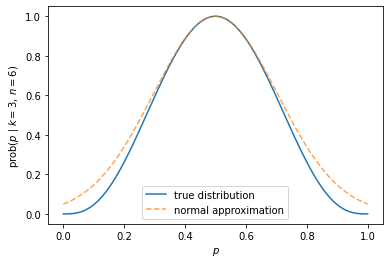

In [ ]:
n = 6 #@param {type:"integer"}
k = 3 #@param {type:"integer"}

pdf = lambda p: p**k * (1-p)**(n-k) / beta(k+1, n-k+1)

mu = k/n
sigma = np.sqrt(mu * (1-mu) / n)
normal = lambda p: 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5/sigma**2*(p-mu)**2)

x = np.linspace(0, 1, 1000)

plt.plot(x, pdf(x)/pdf(mu), label='true distribution')
plt.plot(x, normal(x)/normal(mu), alpha=0.7, ls='--', label='normal approximation')

plt.xlabel(r'$p$')
plt.ylabel(rf'$\mathrm{{prob}} \left( p \mid k = {k} ,\, n = {n} \right)$')
plt.legend()

# Poisson rate

Observation:
$$
  k = \mathrm{number\ of\ counts}
$$
Model:
$$
  \lambda = \mathrm{intrinsic\ rate\ of\ counts\ (multiplied\ by \ observation\ time)}
$$
Prior:
$$
  p \left( \lambda \right)
  \propto
  \begin{cases}
    \frac{1}{\lambda} , & \lambda_0 < \lambda < \lambda_1 \\
    0, & \mathrm{otherwise}
  \end{cases}
  \, .
$$
The posterior probability is given by
$$
  p \left( \lambda \mid k \right)
  =
  \begin{cases}
    \frac{
      \lambda^{k-1} e^{-\lambda}
    }{
      \gamma \left( k, \lambda_1 \right) - \gamma \left( k, \lambda_0 \right)
    } ,
    &
    \lambda_0 < \lambda < \lambda_1
    \\
    0, & \mathrm{otherwise}
  \end{cases}
  \, .
$$
where $\gamma \left( \ell, a \right)$ is the incomplete Gamma function.

The posterior can be approximated by a Gaussian with mean $\mu = k-1$ and variance $\sigma^2 = \mu$.

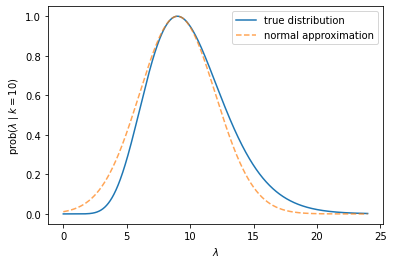

In [ ]:
k = 10 #@param {type:"integer"}

lam0, lam1 = k/5, k*5

norm = gamma(k) * (gammainc(k,lam1) - gammainc(k,lam0))
pdf = lambda lam: lam**(k-1) * np.exp(-lam) / norm

mu = k - 1
sigma = np.sqrt(mu)
normal = lambda lam: 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5/sigma**2*(lam-mu)**2)

x = np.linspace(max(mu-5*sigma,0), mu+5*sigma, 1000)

plt.plot(x, pdf(x)/pdf(mu), label='true distribution')
plt.plot(x, normal(x)/normal(mu), alpha=0.7, ls='--', label='normal approximation')

plt.xlabel(r'$\lambda$')
plt.ylabel(rf'$\mathrm{{prob}} \left( \lambda \mid k = {k} \right)$')
plt.legend()